<a href="https://colab.research.google.com/github/Snafkin547/Quantum-ML/blob/main/QML_Ch5_qbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install numpy scipy matplotlib ipython pandas sympy nose seaborn
!pip install scikit-learn
!pip install pylatexenc ipywidgets qutip
!pip install kaggle

from google.colab import drive
import os

#Google Drive mounting to Google Colab
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/QML/Kaggle"
#Change the working directory
%cd /content/gdrive/My Drive/QML/Kaggle/

#Check if the directory was properly changed
%pwd

In [ ]:
from math import sqrt

#initial state

psi=[0.5, sqrt(3)/2]
always_0=[1,0]
always_1=[0,1]

def transform(name, state, f):
  print('{}:[{:.2f},{:.2f}] result: [{:.2f},{:.2f}]'.format(name, *state, *f(state)))

def reverse_state(arr):
  return list(reversed(arr))

print("−−−−−−−−−−− Reversed states: −−−−−−−−−−")
transform("psi", psi, reverse_state)
transform("|0>", always_0, reverse_state)
transform("|1>", always_1, reverse_state)


−−−−−−−−−−− Reversed states: −−−−−−−−−−
psi:[0.50,0.87] result: [0.87,0.50]
|0>:[1.00,0.00] result: [0.00,1.00]
|1>:[0.00,1.00] result: [1.00,0.00]


#### X Gate

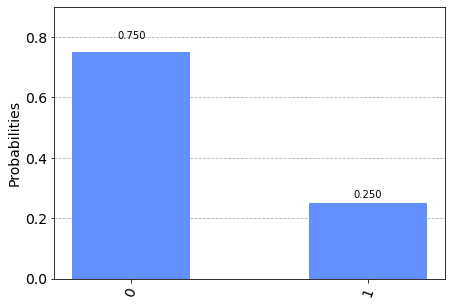

In [ ]:
from qiskit import execute, Aer, QuantumCircuit
from qiskit.visualization import plot_histogram

qc=QuantumCircuit(1)
qc.initialize(psi,0)

# X gate from IBM SDK Qiskit, which reverses the state
qc.x(0)

# Return result
backend=Aer.get_backend('statevector_simulator')
result=execute(qc, backend).result()

#Counter for the result of measurement
counts=result.get_counts()

plot_histogram(counts)

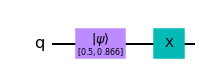

In [ ]:
qc.draw('mpl')

In [ ]:
#Self-made X gate
def adjust_weight(state, weights):
  return state[0]*weights[0]+state[1]*weights[1]

print ('reversed psi: [{:.2f}, {:.2f}]'.format(
adjust_weight(psi, [0,1]),
adjust_weight(psi, [1,0])))

reversed psi: [0.87, 0.50]


#### Hadamard Gate

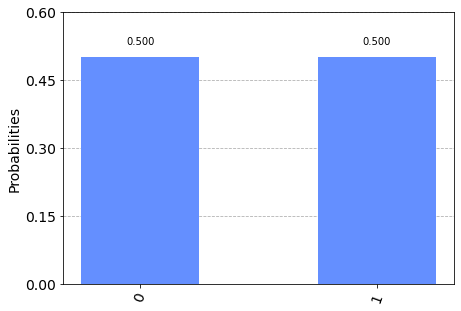

In [ ]:
from qiskit import execute, Aer, QuantumCircuit
from qiskit.visualization import plot_histogram

qc=QuantumCircuit(1)

initial_state=[1,0]
qc.initialize(initial_state,0)

# X gate from IBM SDK Qiskit, which reverses the state
qc.h(0)

# Return result
backend=Aer.get_backend('statevector_simulator')
result=execute(qc, backend).result()

#Counter for the result of measurement
counts=result.get_counts()

plot_histogram(counts)


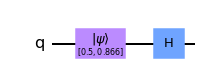

In [ ]:
qc.draw('mpl')

#### Hadamard Gate twice

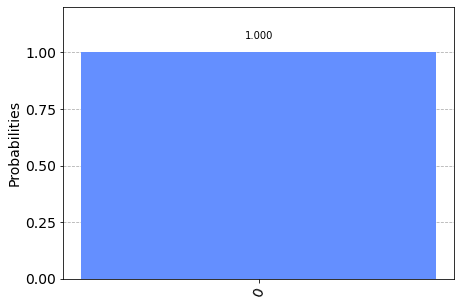

In [ ]:
from qiskit import execute, Aer, QuantumCircuit
from qiskit.visualization import plot_histogram

qc=QuantumCircuit(1)

initial_state=[1,0]
qc.initialize(initial_state,0)

# X gate from IBM SDK Qiskit, which reverses the state
qc.h(0)

# X gate from IBM SDK Qiskit, which reverses the state again
qc.h(0)

# Return result
backend=Aer.get_backend('statevector_simulator')
result=execute(qc, backend).result()

#Counter for the result of measurement
counts=result.get_counts()

plot_histogram(counts)


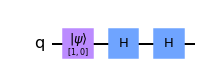

In [ ]:
qc.draw('mpl')

#### Rotate the qubit state

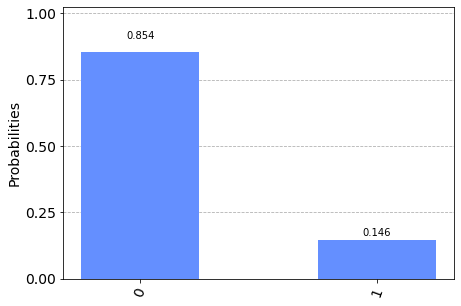

In [ ]:
from qiskit import execute, Aer, QuantumCircuit
from qiskit.visualization import plot_histogram
from math import pi, sqrt, sin, cos

qc=QuantumCircuit(1)

initial_state=[1,0]
qc.initialize(initial_state,0)

# rotate the 0th qubit in the initial state by a quarter of a half circle
qc.ry(pi/4,0)

# Return result
backend=Aer.get_backend('statevector_simulator')
result=execute(qc, backend).result()

#Counter for the result of measurement
counts=result.get_counts()

plot_histogram(counts)

### Rotate function to make a certain probability

In [23]:
from math import asin

def prob_to_angle(prob):
  return 2*asin(sqrt(prob))

'''
sin(theta/2)= sqrt(P(pi))
theta/2=sin^(-1)*sqrt(P(po))
theta=2*sin^(-1)*sqrt(P(po))
'''

'\nsin(theta/2)= sqrt(P(pi))\ntheta/2=sin^(-1)*sqrt(P(po))\ntheta=2*sin^(-1)*sqrt(P(po))\n'

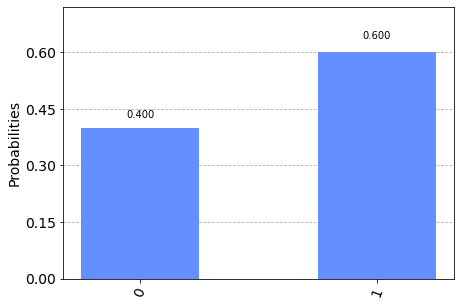

In [ ]:
from qiskit import execute, Aer, QuantumCircuit
from qiskit.visualization import plot_histogram
from math import pi, sqrt, sin, cos

qc=QuantumCircuit(1)

initial_state=[1,0]
qc.initialize(initial_state,0)

# Making prob to receive 1 by 60% of chance
qc.ry(prob_to_angle(0.6),0)

# Return result
backend=Aer.get_backend('statevector_simulator')
result=execute(qc, backend).result()

#Counter for the result of measurement
counts=result.get_counts()

plot_histogram(counts)

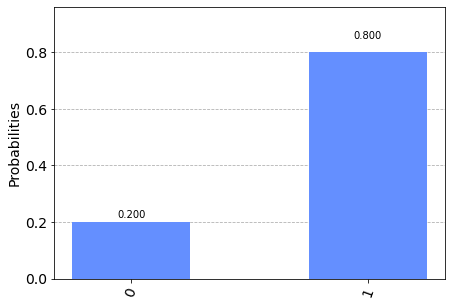

In [26]:
from qiskit import execute, Aer, QuantumCircuit
from qiskit.visualization import plot_histogram
from math import pi, sqrt, sin, cos

qc=QuantumCircuit(1)

initial_state=[1/sqrt(2),1/sqrt(2)]
qc.initialize(initial_state,0)

# Making prob to receive 1 by 60% of chance
qc.ry(prob_to_angle(0.1),0)

# Return result
backend=Aer.get_backend('statevector_simulator')
result=execute(qc, backend).result()

#Counter for the result of measurement
counts=result.get_counts()

plot_histogram(counts)



Adjustment for proper probabilities

In [27]:
from math import asin

def prob_to_angle_with_prior(prob, prior):
  return 2*asin(sqrt(prob+prior))-2*asin(sqrt(prior))

'''
Calculate based on the total angle
'''

'\nCalculate based on the total angle\n'

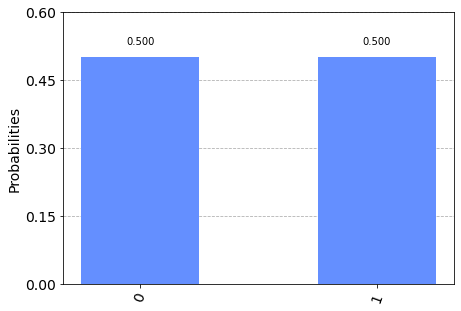

In [29]:
##50:50

from qiskit import execute, Aer, QuantumCircuit
from qiskit.visualization import plot_histogram
from math import pi, sqrt, sin, cos

qc=QuantumCircuit(1)

initial_state=[1/sqrt(2),1/sqrt(2)]
qc.initialize(initial_state,0)


# Return result
backend=Aer.get_backend('statevector_simulator')
result=execute(qc, backend).result()

#Counter for the result of measurement
counts=result.get_counts()

plot_histogram(counts)

### Rotate the state by 10 degree

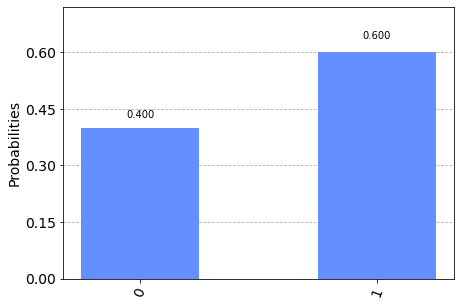

In [28]:
from qiskit import execute, Aer, QuantumCircuit
from qiskit.visualization import plot_histogram
from math import pi, sqrt, sin, cos

qc=QuantumCircuit(1)

initial_state=[1/sqrt(2),1/sqrt(2)]
qc.initialize(initial_state,0)

# Making prob to receive 1 by 60% of chance
qc.ry(prob_to_angle_with_prior(0.1, 0.5),0)

# Return result
backend=Aer.get_backend('statevector_simulator')
result=execute(qc, backend).result()

#Counter for the result of measurement
counts=result.get_counts()

plot_histogram(counts)